In [1]:
# pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

100% 3.16G/3.17G [01:25<00:00, 43.6MB/s]
100% 3.17G/3.17G [01:25<00:00, 39.9MB/s]


In [5]:
# !unzip capital-alphabets-28x28.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasetSmall/validation/t/002691.png  
  inflating: datasetSmall/validation/t/002692.png  
  inflating: datasetSmall/validation/t/002693.png  
  inflating: datasetSmall/validation/t/002694.png  
  inflating: datasetSmall/validation/t/002695.png  
  inflating: datasetSmall/validation/t/002696.png  
  inflating: datasetSmall/validation/t/002697.png  
  inflating: datasetSmall/validation/t/002698.png  
  inflating: datasetSmall/validation/t/002699.png  
  inflating: datasetSmall/validation/t/002700.png  
  inflating: datasetSmall/validation/t/002701.png  
  inflating: datasetSmall/validation/t/002702.png  
  inflating: datasetSmall/validation/t/002703.png  
  inflating: datasetSmall/validation/t/002704.png  
  inflating: datasetSmall/validation/t/002705.png  
  inflating: datasetSmall/validation/t/002706.png  
  inflating: datasetSmall/validation/t/002707.png  
  inflating: datasetSmall/validation/t/002708.png  
  inflating: 

In [6]:
# !rm capital-alphabets-28x28.zip

In [7]:
# !mv /content/datasetSmall/test/* /content/dataset/test
# !mv /content/datasetSmall/train/* /content/dataset/train
# !mv /content/datasetSmall/validation/* /content/dataset/validation

In [8]:
# !mv /content/datasetDigit/test/* /content/dataset/test
# !mv /content/datasetDigit/train/* /content/dataset/train
# !mv /content/datasetDigit/validation/* /content/dataset/validation

In [9]:
# !rm -rf datasetSmall
# !rm -rf datasetDigit

In [10]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt
import os

In [11]:
train_dir = "/content/dataset/train"
val_dir = "/content/dataset/validation"
test_dir = "/content/dataset/test"

In [12]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                batch_size=64,
                                                                image_size=(256, 256),
                                                                label_mode="categorical",
                                                                seed=0)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              batch_size=64,
                                                              image_size=(256, 256),
                                                              label_mode="categorical",
                                                              seed=0)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              batch_size=64,
                                                              image_size=(256, 256),
                                                              label_mode="categorical",
                                                              seed=0,
                                                              shuffle=False)

Found 487227 files belonging to 62 classes.
Found 155686 files belonging to 62 classes.
Found 155489 files belonging to 62 classes.


In [97]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu', input_shape=[256, 256, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(62, activation="softmax", name="output_layer")
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x=train_data, validation_data=val_data, epochs=10, steps_per_epoch=150, validation_steps=50)

Epoch 1/10
150/150 [==============================] - 55s 353ms/step - loss: 2.0178 - accuracy: 0.4871 - val_loss: 1.2230 - val_accuracy: 0.6450
Epoch 2/10
150/150 [==============================] - 53s 351ms/step - loss: 1.0675 - accuracy: 0.6897 - val_loss: 0.9380 - val_accuracy: 0.7206
Epoch 3/10
150/150 [==============================] - 57s 383ms/step - loss: 0.9217 - accuracy: 0.7207 - val_loss: 0.9375 - val_accuracy: 0.7144
Epoch 4/10
150/150 [==============================] - 52s 347ms/step - loss: 0.8466 - accuracy: 0.7431 - val_loss: 0.8276 - val_accuracy: 0.7531
Epoch 5/10
150/150 [==============================] - 52s 348ms/step - loss: 0.7742 - accuracy: 0.7650 - val_loss: 0.8153 - val_accuracy: 0.7397
Epoch 6/10
150/150 [==============================] - 52s 349ms/step - loss: 0.7527 - accuracy: 0.7710 - val_loss: 0.7667 - val_accuracy: 0.7666
Epoch 7/10
150/150 [==============================] - 52s 348ms/step - loss: 0.7581 - accuracy: 0.7622 - val_loss: 0.7811 - val_ac

In [98]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 254, 254, 60)      1680      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 127, 127, 60)     0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 125, 125, 60)      32460     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 62, 62, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 60, 60, 60)      

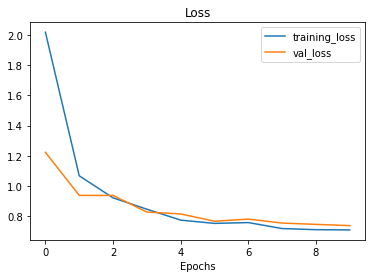

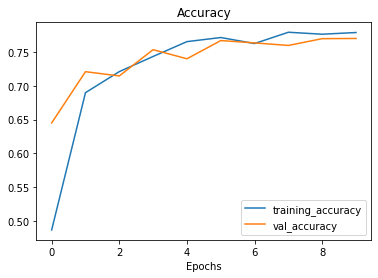

In [99]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

epochs = range(len(model_history.history['loss']))

#Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

#Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [100]:
test_loss, test_accuracy = model.evaluate(test_data)
test_loss, test_accuracy

2430/2430 [==============================] - 300s 123ms/step - loss: 0.7172 - accuracy: 0.7753


(0.7171937823295593, 0.775257408618927)

In [101]:
pred_probs = model.predict(test_data, verbose=1)
print(len(pred_probs))
print(pred_probs.shape)
print(pred_probs[0])

2430/2430 [==============================] - 342s 141ms/step
155489
(155489, 62)
[6.42990291e-01 3.90116055e-03 7.56600202e-05 5.83747678e-05
 1.76647445e-04 1.75311550e-04 1.00822514e-03 4.44401347e-04
 1.90104614e-03 2.35345704e-03 1.21945392e-04 1.81525177e-03
 1.05800224e-03 1.23393731e-02 5.67825518e-05 6.73052782e-05
 1.69686857e-04 3.94259951e-06 8.80986452e-04 5.83944784e-05
 1.22413148e-05 3.10907817e-05 2.01985004e-05 1.08487686e-04
 2.98174500e-01 1.05755846e-03 3.99678294e-03 5.98609586e-05
 1.55539630e-04 2.63238162e-05 5.58726490e-04 1.83463853e-04
 1.07363476e-05 7.50103482e-08 1.54751233e-05 7.71884061e-07
 1.75761210e-03 1.73466760e-05 1.05819847e-04 7.96709210e-05
 5.72868565e-04 1.59680683e-04 3.25269240e-04 1.16703895e-05
 6.43792795e-04 1.74802772e-05 1.08655577e-05 6.47458190e-04
 6.59107309e-06 2.80551845e-04 1.77848712e-02 2.05178116e-03
 6.09867158e-04 2.29060548e-04 1.37727024e-04 2.91487049e-05
 9.13795811e-05 3.26372829e-04 2.66947882e-05 8.33209072e-07
 5.7

In [102]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 62
What prediction probability sample 0 looks like:
 [6.42990291e-01 3.90116055e-03 7.56600202e-05 5.83747678e-05
 1.76647445e-04 1.75311550e-04 1.00822514e-03 4.44401347e-04
 1.90104614e-03 2.35345704e-03 1.21945392e-04 1.81525177e-03
 1.05800224e-03 1.23393731e-02 5.67825518e-05 6.73052782e-05
 1.69686857e-04 3.94259951e-06 8.80986452e-04 5.83944784e-05
 1.22413148e-05 3.10907817e-05 2.01985004e-05 1.08487686e-04
 2.98174500e-01 1.05755846e-03 3.99678294e-03 5.98609586e-05
 1.55539630e-04 2.63238162e-05 5.58726490e-04 1.83463853e-04
 1.07363476e-05 7.50103482e-08 1.54751233e-05 7.71884061e-07
 1.75761210e-03 1.73466760e-05 1.05819847e-04 7.96709210e-05
 5.72868565e-04 1.59680683e-04 3.25269240e-04 1.16703895e-05
 6.43792795e-04 1.74802772e-05 1.08655577e-05 6.47458190e-04
 6.59107309e-06 2.80551845e-04 1.77848712e-02 2.05178116e-03
 6.09867158e-04 2.29060548e-04 1.37727024e-04 2.91487049e-05
 9.13795811e-05 3.26372829e-04 2.66947882e-0

In [103]:
pred_classes = pred_probs.argmax(axis=1)
print(pred_classes[:10])

[ 0  0  0  0 24  0  0  0  0  0]


In [104]:
test_labels = []

for images, labels in test_data.unbatch():
  test_labels.append(labels.numpy().argmax())

print(test_labels[:10])
print(len(test_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
155489


In [105]:
class_names = test_data.class_names
print(class_names[:10])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [106]:
model.save('OCR_Dataset2_All_Custom.h5')

In [115]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  img = tf.image.grayscale_to_rgb(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

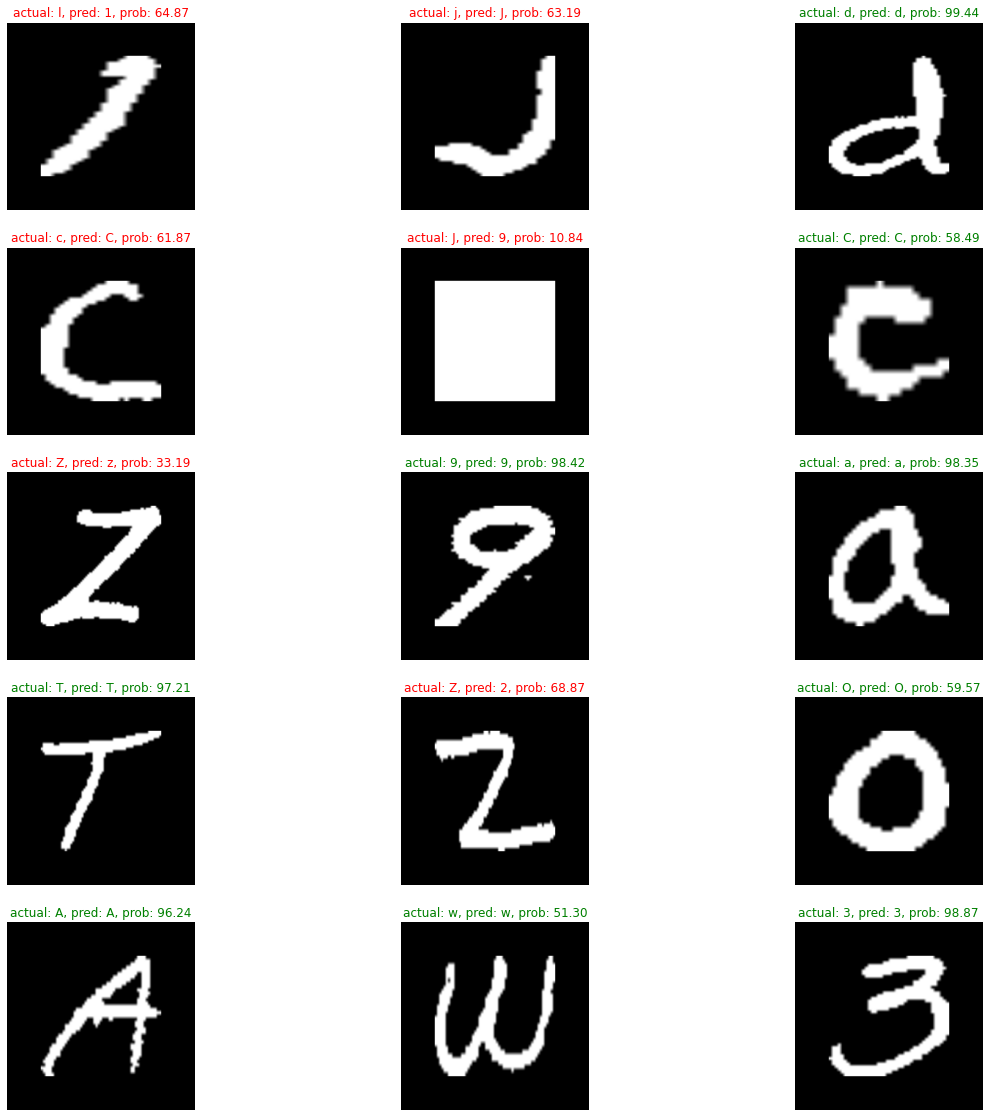

In [119]:
plt.figure(figsize=(20, 20))

for i in range(15):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + '/' + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(5, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max()*100:.2f}", c=title_color)
  plt.axis(False);